In [45]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

RS= pd.read_csv('Downloads\Rohit-Sharma-All-International-Cricket-Centuries.csv', parse_dates=True)


In [33]:
RS.head()

,No.,Score,Against,Position,Innings,Venue,Ground,Date,Result
0,1,114,Zimbabwe,4,1,"Queens Sports Club, Bulawayo",Away,28-May-10,Lost
1,2,101*,Sri Lanka,4,2,"Queens Sports Club, Bulawayo",Neutral,30-May-10,Won
2,3,141*,Australia,1,2,"Sawai Mansingh Stadium, Jaipur",Home,16-Oct-13,Won
3,4,209,Australia,1,1,"M. Chinnaswamy Stadium, Bangalore",Home,02-Nov-13,Won
4,5,177,West Indies,6,2,"Eden Gardens, Kolkata",Home,06-Nov-13,Won


In [35]:
RS.shape

(43, 9)

In [37]:
RS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43 entries, 0 to 42
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   No.       43 non-null     int64 
 1   Score     43 non-null     object
 2   Against   43 non-null     object
 3   Position  43 non-null     int64 
 4   Innings   43 non-null     int64 
 5   Venue     43 non-null     object
 6   Ground    43 non-null     object
 7   Date      43 non-null     object
 8   Result    43 non-null     object
dtypes: int64(3), object(6)
memory usage: 3.2+ KB


In [39]:
RS.tail()

,No.,Score,Against,Position,Innings,Venue,Ground,Date,Result
38,39,119,Australia,1,2,"M. Chinnaswamy Stadium, Bangalore",Home,19-Jan-20,Won
39,40,161,England,1,1,"M. A. Chidambaram Stadium, Chennai",Home,13-Feb-21,Won
40,41,127,England,1,3,"The Oval, London",Away,02-Sep-21,Won
41,42,101,New Zealand,1,1,"Holkar Cricket Stadium, Indore",Home,24-Jan-23,Won
42,43,120,Australia,1,2,"Vidarbha Cricket Association Stadium, Nagpur",Home,09-Feb-23,Won


In [41]:
RS.describe()

,No.,Position,Innings
count,43.000000,43.000000,43.000000
mean,22.000000,1.697674,1.534884
std,12.556539,1.389328,0.591561
min,1.000000,1.000000,1.000000
25%,11.500000,1.000000,1.000000
50%,22.000000,1.000000,1.000000
75%,32.500000,2.000000,2.000000
max,43.000000,6.000000,3.000000


In [49]:
RS['Date']= pd.to_datetime(RS['Date'])

In [53]:
RS.head()

,No.,Score,Against,Position,Innings,Venue,Ground,Date,Result
0,1,114,Zimbabwe,4,1,"Queens Sports Club, Bulawayo",Away,28-May-10,Lost
1,2,101*,Sri Lanka,4,2,"Queens Sports Club, Bulawayo",Neutral,30-May-10,Won
2,3,141*,Australia,1,2,"Sawai Mansingh Stadium, Jaipur",Home,16-Oct-13,Won
3,4,209,Australia,1,1,"M. Chinnaswamy Stadium, Bangalore",Home,02-Nov-13,Won
4,5,177,West Indies,6,2,"Eden Gardens, Kolkata",Home,06-Nov-13,Won


In [73]:
RS.dtypes

No.                  int64
Score               object
Against             object
Position             int64
Innings              int64
Venue               object
Ground              object
Date        datetime64[ns]
Result              object
dtype: object

In [75]:
RS= RS.rename(columns={'Score': 'Runs'})


In [77]:
RS.head()

,No.,Runs,Against,Position,Innings,Venue,Ground,Date,Result
0,1,114,Zimbabwe,4,1,"Queens Sports Club, Bulawayo",Away,2010-05-28,Lost
1,2,101*,Sri Lanka,4,2,"Queens Sports Club, Bulawayo",Neutral,2010-05-30,Won
2,3,141*,Australia,1,2,"Sawai Mansingh Stadium, Jaipur",Home,2013-10-16,Won
3,4,209,Australia,1,1,"M. Chinnaswamy Stadium, Bangalore",Home,2013-11-02,Won
4,5,177,West Indies,6,2,"Eden Gardens, Kolkata",Home,2013-11-06,Won


In [129]:
RS['Year']= RS['Date'].dt.year
RS['Runs']= RS['Runs'].astype(str)


In [ ]:
RS['Out/Not-Out']= RS['Runs'].str.contains(r'[^\w\s]', regex= True)
RS.loc[RS['Out/Not-Out']== True, 'Out/Not-Out' ] = 'Not Out'
RS.loc[RS['Out/Not-Out']== False, 'Out/Not-Out' ] = 'Out'
RS

In [200]:
RS['Runs']= RS['Runs'].replace(r'[^\w\s]', '' )
RS['Runs']= RS['Runs'].astype(str).astype(int)
RS.head()

,No.,Runs,Against,Position,Innings,Venue,Ground,Date,Result,Year,Out/NOt-Out,Out/Not-Out
0,1,114,Zimbabwe,4,1,"Queens Sports Club, Bulawayo",Away,2010-05-28,Lost,2010,False,Out
1,2,101,Sri Lanka,4,2,"Queens Sports Club, Bulawayo",Neutral,2010-05-30,Won,2010,True,Not Out
2,3,141,Australia,1,2,"Sawai Mansingh Stadium, Jaipur",Home,2013-10-16,Won,2013,True,Not Out
3,4,209,Australia,1,1,"M. Chinnaswamy Stadium, Bangalore",Home,2013-11-02,Won,2013,False,Out
4,5,177,West Indies,6,2,"Eden Gardens, Kolkata",Home,2013-11-06,Won,2013,False,Out


In [202]:
RS.tail()

,No.,Runs,Against,Position,Innings,Venue,Ground,Date,Result,Year,Out/NOt-Out,Out/Not-Out
38,39,119,Australia,1,2,"M. Chinnaswamy Stadium, Bangalore",Home,2020-01-19,Won,2020,False,Out
39,40,161,England,1,1,"M. A. Chidambaram Stadium, Chennai",Home,2021-02-13,Won,2021,False,Out
40,41,127,England,1,3,"The Oval, London",Away,2021-09-02,Won,2021,False,Out
41,42,101,New Zealand,1,1,"Holkar Cricket Stadium, Indore",Home,2023-01-24,Won,2023,False,Out
42,43,120,Australia,1,2,"Vidarbha Cricket Association Stadium, Nagpur",Home,2023-02-09,Won,2023,False,Out


In [204]:
RS['Runs'].max()

264

In [208]:
RS['Against'].value_counts()

Against
 Australia       9
 Sri Lanka       8
 South Africa    7
 West Indies     6
 England         5
 Bangladesh      3
 New Zealand     2
 Pakistan        2
 Zimbabwe        1
Name: count, dtype: int64

In [210]:
RS["Position"].value_counts()

Position
1    29
2     9
6     3
4     2
Name: count, dtype: int64

In [212]:
RS['Innings'].value_counts()

Innings
1    22
2    19
3     2
Name: count, dtype: int64

In [214]:
RS['Venue'].value_counts()

Venue
Vidarbha Cricket Association Stadium, Nagpur          3
Edgbaston Cricket Ground, Birmingham                  3
Queens Sports Club, Bulawayo                          2
Green Park Stadium, Kanpur                            2
Holkar Cricket Stadium, Indore                        2
VDCA Cricket Stadium, Vishakhapatnam                  2
Melbourne Cricket Ground, Melbourne                   2
Eden Gardens, Kolkata                                 2
M. Chinnaswamy Stadium, Bangalore                     2
ACA-VDCA Stadium, Vishakhapatnam                      1
JSCA International Stadium Complex, Ranchi            1
ACA Stadium, Guwahati                                 1
M. A. Chidambaram Stadium, Chennai                    1
Headingley Cricket Ground, Leeds                      1
Old Trafford Cricket Ground, Manchester               1
Rose Bowl, Southampton                                1
Sydney Cricket Ground, Sydney                         1
Ekana Stadium, Lucknow                    

In [216]:
RS['Ground'].value_counts()

Ground
Home       23
Away       12
Neutral     8
Name: count, dtype: int64

In [218]:
RS['Result'].value_counts()

Result
Won          34
Lost          8
Won (D/L)     1
Name: count, dtype: int64

In [220]:
RS['Out/Not-Out'].value_counts()

Out/Not-Out
Out        29
Not Out    14
Name: count, dtype: int64

In [222]:
RS['Year'].value_counts()

Year
2019    10
2017     8
2018     7
2013     4
2015     4
2010     2
2016     2
2021     2
2023     2
2014     1
2020     1
Name: count, dtype: int64

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, ' Australia'),
  Text(1, 0, ' Sri Lanka'),
  Text(2, 0, ' South Africa'),
  Text(3, 0, ' West Indies'),
  Text(4, 0, ' England'),
  Text(5, 0, ' Bangladesh'),
  Text(6, 0, ' New Zealand'),
  Text(7, 0, ' Pakistan'),
  Text(8, 0, ' Zimbabwe')])

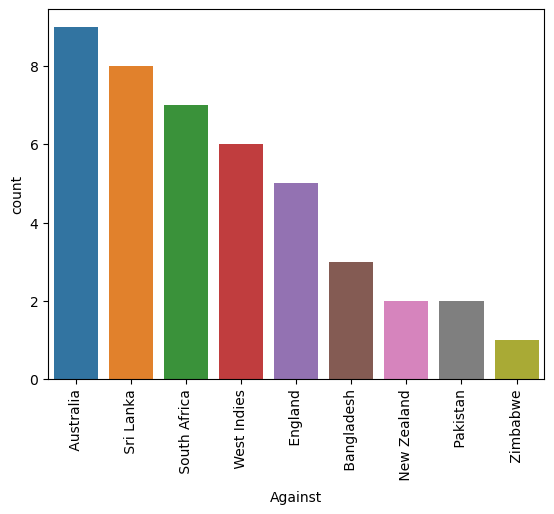

In [235]:
sns.countplot(data= RS, x= 'Against', order= RS['Against'].value_counts().index)
plt.xticks(rotation=90)

(array([0, 1, 2, 3]),
 [Text(0, 0, '1'), Text(1, 0, '2'), Text(2, 0, '6'), Text(3, 0, '4')])

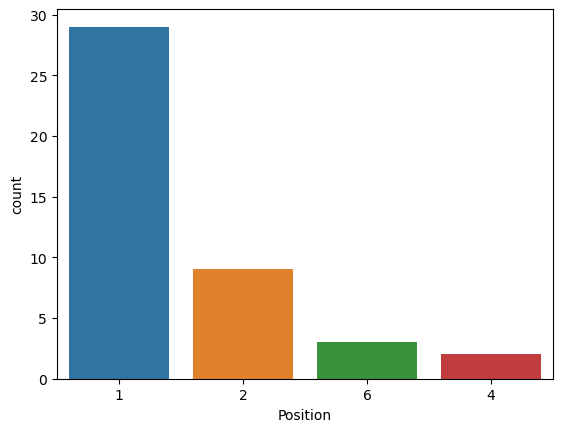

In [243]:
sns.countplot(data=RS, x= ('Position'), order= RS['Position'].value_counts().index )
plt.xticks()

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, ' Zimbabwe'),
  Text(1, 0, ' Sri Lanka'),
  Text(2, 0, ' Australia'),
  Text(3, 0, ' West Indies'),
  Text(4, 0, ' Bangladesh'),
  Text(5, 0, ' South Africa'),
  Text(6, 0, ' New Zealand'),
  Text(7, 0, ' England'),
  Text(8, 0, ' Pakistan')])

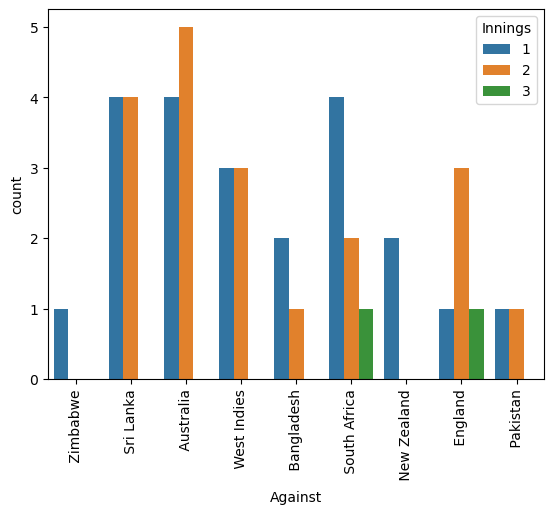

In [255]:
# Convert the 'Innings' column to string
RS['Innings'] = RS['Innings'].astype(str)


sns.countplot(data=RS, x= 'Against', hue= 'Innings')
plt.xticks(rotation=90)

(array([0, 1, 2]),
 [Text(0, 0, 'Away'), Text(1, 0, 'Neutral'), Text(2, 0, 'Home')])

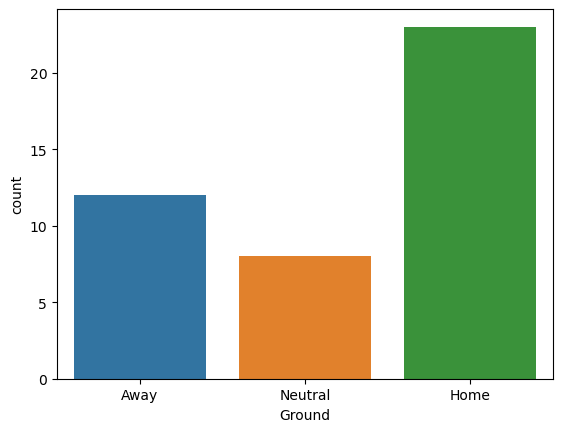

In [263]:
sns.countplot(data=RS,x='Ground')
plt.xticks()


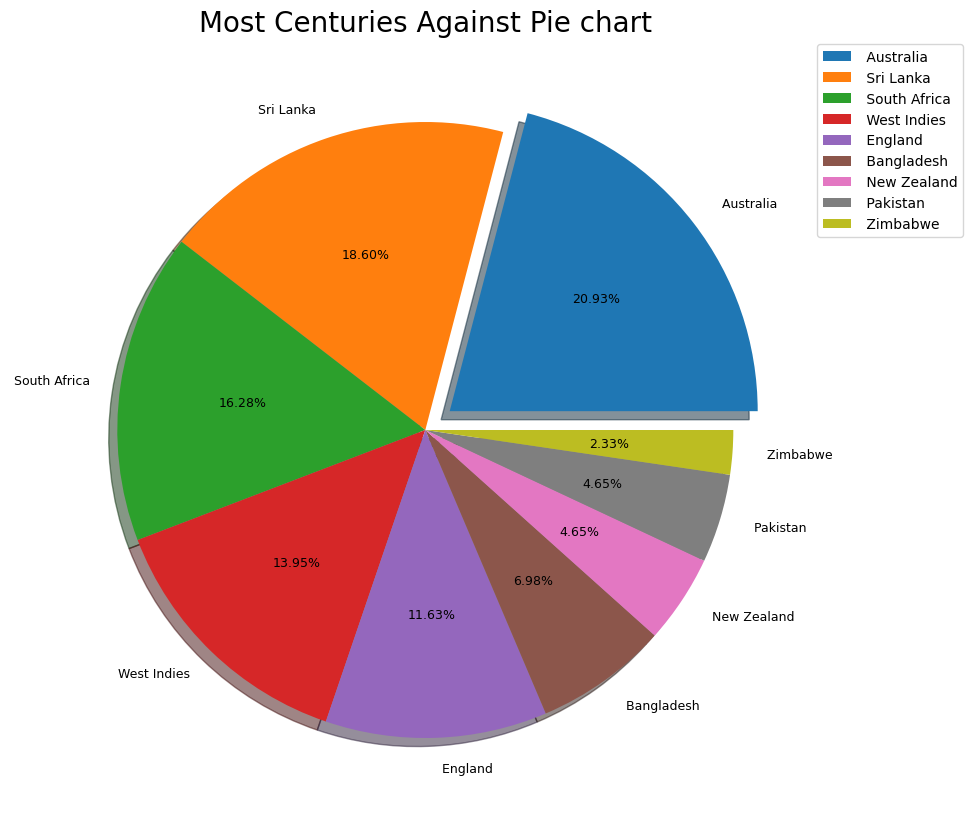

In [271]:
import matplotlib.pyplot as plt
label = RS['Against'].value_counts()
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
          '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
colors = colors[:len(label)]
explode = [0.1] + [0] * (len(label) - 1)

plt.figure(figsize=(20, 10))
plt.pie(label, labels=label.index, autopct='%1.2f%%', textprops={'fontsize':9}, shadow=True, explode=explode, colors=colors)
plt.title('Most Centuries Against Pie chart', fontdict={"fontsize":20}, pad=10)
plt.legend(bbox_to_anchor=[1, 1.01])
plt.show()